# Flanker task timing test plots

## Load Test 1 data

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# MindLogger exported Flanker csv table with test data:
base_dir = '/Users/arno/Software/mindlogger-time-tests/'
csv_file = base_dir + 'input/flanker_test_20220415/62572d803646a059f4f060f9_test1.csv'
columns = ['block_number','trial_number','trial_type','event_type','experiment_start_timestamp',
           'block_start_timestamp','trial_start_timestamp','event_start_timestamp',
           'video_display_request_timestamp','response_touch_timestamp','trial_offset','event_offset',
           'response_time','response','response_accuracy']
df = pd.read_csv(csv_file, usecols=columns)
nsamples = len(df.response_touch_timestamp)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [27]:
df

,block_number,trial_number,trial_type,event_type,experiment_start_timestamp,block_start_timestamp,trial_start_timestamp,event_start_timestamp,video_display_request_timestamp,response_touch_timestamp,trial_offset,event_offset,response_time,response,response_accuracy
0,1,1,2,Fixation,1649880390.533,1649880406.209,1649880406.209,1649880406.209,1649880406.209,.,0.000,0.000,.,.,.
1,1,1,2,Stimulus,1649880390.533,1649880406.209,1649880406.209,1649880406.713,1649880406.713,.,0.000,0.504,.,.,.
2,1,1,2,Response,.,.,.,.,.,1649880407.180,0.000,.,0.467,R,1
3,1,2,3,Fixation,1649880390.533,1649880406.209,1649880407.181,1649880407.181,1649880407.181,.,0.972,0.000,.,.,.
4,1,2,3,Stimulus,1649880390.533,1649880406.209,1649880407.181,1649880407.683,1649880407.683,.,0.972,0.502,.,.,.
5,1,2,3,Response,.,.,.,.,.,1649880408.138,0.972,.,0.455,L,1
6,1,3,5,Fixation,1649880390.533,1649880406.209,1649880408.139,1649880408.139,1649880408.139,.,1.930,0.000,.,.,.
7,1,3,5,Stimulus,1649880390.533,1649880406.209,1649880408.139,1649880408.641,1649880408.641,.,1.930,0.502,.,.,.
8,1,3,5,Response,.,.,.,.,.,1649880409.035,1.930,.,0.394,L,1
9,1,4,4,Fixation,1649880390.533,1649880406.209,1649880409.035,1649880409.035,1649880409.035,.,2.826,0.000,.,.,.


## Touch to fixation

  - Define touch to fixation in the data export as the time between recorded response_touch_timestamp and recorded event_start_timestamp representing the next fixation event. 

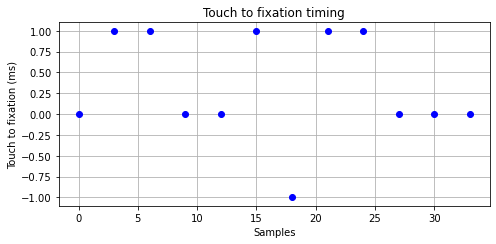

Touch to fixation time:
Data mean (SD): 0.33 (0.62) ms


In [38]:
touch_to_fixation = pd.Series(np.zeros(nsamples))
i = 0
for sample in range(nsamples):
    i = i + 1
    if i > 1:
        if i % 3 == 1:
            touch_to_fixation[i-1] = float(df.event_start_timestamp[i-1]) - float(df.response_touch_timestamp[i-2])
        else:
            touch_to_fixation[i-1] = np.nan

touch_to_fixation = 1000 * touch_to_fixation

plt.plot(range(len(touch_to_fixation)), touch_to_fixation, marker='o', linestyle='-', color='b')
plt.title('Touch to fixation timing')
plt.xlabel ('Samples')
plt.ylabel ('Touch to fixation (ms)')
plt.grid()
plt.show()

print("Touch to fixation time:")
print("Data mean (SD): {0:.2f} ({1:.2f}) ms".format(np.mean(touch_to_fixation), np.std(touch_to_fixation)))

## Fixation to stimulus

  - Define fixation to stimulus in the data export as the time between recorded trial_start_timestamp (fixation presentation) and recorded event_start_timestamp representing the next stimulus event. 

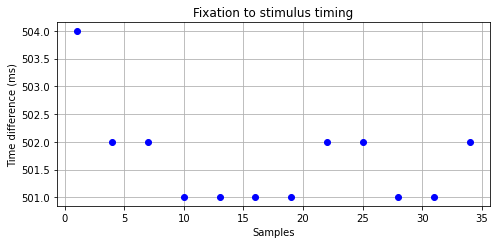

Fixation to stimulus time:
Data mean (SD): 501.667 (0.850) ms


In [39]:
fixation_to_stimulus = pd.Series(np.zeros(nsamples))

i = 0
for sample in range(nsamples):
    i = i + 1
    if i % 3 == 2:
        fixation_to_stimulus[i-1] = float(df.event_start_timestamp[i-1]) - float(df.trial_start_timestamp[i-2])
    else:
        fixation_to_stimulus[i-1] = np.nan

fixation_to_stimulus = 1000 * fixation_to_stimulus
        
plt.plot(range(len(touch_to_fixation)), fixation_to_stimulus, marker='o', linestyle='', color='b')
plt.title('Fixation to stimulus timing')
plt.xlabel ('Samples')
plt.ylabel ('Time difference (ms)')
plt.grid()
plt.show()

print("Fixation to stimulus time:")
print("Data mean (SD): {0:.3f} ({1:.3f}) ms".format(np.mean(fixation_to_stimulus), np.std(fixation_to_stimulus)))


In [40]:
fixation_to_stimulus

0        NaN
1    504.000
2        NaN
3        NaN
4    502.000
5        NaN
6        NaN
7    502.000
8        NaN
9        NaN
10   501.000
11       NaN
12       NaN
13   501.000
14       NaN
15       NaN
16   501.000
17       NaN
18       NaN
19   501.000
20       NaN
21       NaN
22   502.000
23       NaN
24       NaN
25   502.000
26       NaN
27       NaN
28   501.000
29       NaN
30       NaN
31   501.000
32       NaN
33       NaN
34   502.000
35       NaN
dtype: float64

## Delays over time?

  - Check to see if fixation, stimulus, and touch times recorded by MindLogger are linear

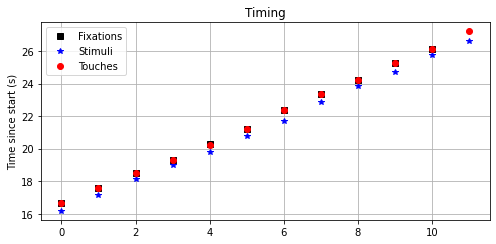

In [42]:
fixations = []
stimuli = []
touches = []
i = 0
for sample in range(nsamples):
    i = i + 1
    if i > 1:
        if i % 3 == 1:
            fixation_diff = float(df.event_start_timestamp[i-1]) - float(df.experiment_start_timestamp[i-1])
            if fixation_diff > 0:
                fixations.append(fixation_diff)          
        elif i % 3 == 2:
            stimulus_diff = float(df.event_start_timestamp[i-1]) - float(df.experiment_start_timestamp[i-1])
            if stimulus_diff > 0:
                stimuli.append(stimulus_diff)         
        elif i % 3 == 0:
            touch_diff = float(df.response_touch_timestamp[i-1]) - float(df.experiment_start_timestamp[i-2])
            if touch_diff > 0:
                touches.append(touch_diff)           

plt.plot(range(len(fixations)), fixations, marker='s', linestyle='', color='k', label='Fixations')
plt.plot(range(len(stimuli)), stimuli, marker='*', linestyle='', color='b', label='Stimuli')
plt.plot(range(len(touches)), touches, marker='o', linestyle='', color='r', label='Touches')
plt.title('Timing')
plt.xlabel ('')
plt.ylabel ('Time since start (s)')
plt.legend()
plt.grid()
plt.show()
